In [1]:
# package(s) related to time, space and id
import datetime, time
import os
import io
import functools
import logging
import pickle
import random
import math

# package(s) related to the simulation
import simpy
import scipy as sc
import math
import networkx as nx  
import numpy as np
import pandas as pd
import re
import yaml as yaml
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

# OpenTNSim
from opentnsim import core
from opentnsim import plot
from opentnsim import model

# spatial libraries 
import shapely.geometry
import shapely.wkt
import pyproj
import shapely.geometry
import folium
import datetime

# package(s) for data handling
import requests

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

# define the coorinate system
geod = pyproj.Geod(ellps="WGS84")

location_vessel_database = "Vessels/richtlijnen-vaarwegen-2017.csv"

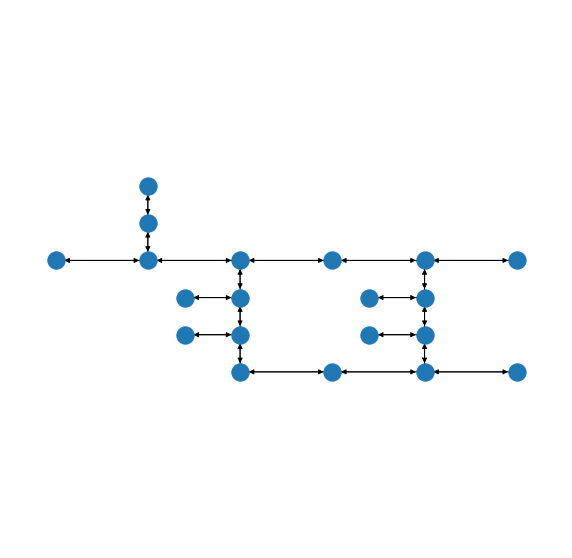

In [2]:
Node = type('Site', (core.Identifiable, core.Log, core.Locatable, core.HasResource), {})
nodes = []
path = []

coords = []
coords.append([0.00,0.00])

for i in range(4):
    coords.append([geod.fwd(coords[i][0],coords[i][1],90,5000)[0],geod.fwd(coords[i][0],coords[i][1],90,5000)[1]])

coords.append([geod.fwd(coords[2][0],coords[2][1],180,2000)[0],geod.fwd(coords[2][0],coords[2][1],180,2000)[1]]) #5
coords.append([geod.fwd(coords[5][0],coords[5][1],180,2000)[0],geod.fwd(coords[5][0],coords[5][1],180,2000)[1]]) #6

coords.append([geod.fwd(coords[4][0],coords[4][1],180,2000)[0],geod.fwd(coords[4][0],coords[4][1],180,2000)[1]]) #7
coords.append([geod.fwd(coords[7][0],coords[7][1],180,2000)[0],geod.fwd(coords[7][0],coords[7][1],180,2000)[1]]) #8

coords.append([geod.fwd(coords[5][0],coords[5][1],270,3000)[0],geod.fwd(coords[5][0],coords[5][1],270,3000)[1]]) #9
coords.append([geod.fwd(coords[6][0],coords[6][1],270,3000)[0],geod.fwd(coords[6][0],coords[6][1],270,3000)[1]]) #10

coords.append([geod.fwd(coords[7][0],coords[7][1],270,3000)[0],geod.fwd(coords[7][0],coords[7][1],270,3000)[1]]) #11
coords.append([geod.fwd(coords[8][0],coords[8][1],270,3000)[0],geod.fwd(coords[8][0],coords[8][1],270,3000)[1]]) #12

coords.append([geod.fwd(coords[6][0],coords[6][1],180,2000)[0],geod.fwd(coords[6][0],coords[6][1],180,2000)[1]]) #13
coords.append([geod.fwd(coords[8][0],coords[8][1],180,2000)[0],geod.fwd(coords[8][0],coords[8][1],180,2000)[1]]) #14
coords.append([geod.fwd(coords[13][0],coords[13][1],90,5000)[0],geod.fwd(coords[13][0],coords[13][1],90,5000)[1]]) #15
coords.append([geod.fwd(coords[14][0],coords[14][1],90,5000)[0],geod.fwd(coords[14][0],coords[14][1],90,5000)[1]]) #16
coords.append([geod.fwd(coords[4][0],coords[4][1],90,5000)[0],geod.fwd(coords[4][0],coords[4][1],90,5000)[1]]) #17

coords.append([geod.fwd(coords[1][0],coords[1][1],0,2000)[0],geod.fwd(coords[1][0],coords[1][1],0,2000)[1]]) #18
coords.append([geod.fwd(coords[18][0],coords[18][1],0,2000)[0],geod.fwd(coords[18][0],coords[18][1],0,2000)[1]]) #19

for d in range(len(coords)):
    data_node = {"env": [],
                 "name": "Node " + str(d+1),
                 "geometry": shapely.geometry.Point(coords[d][0], coords[d][1])}
    node = Node(**data_node)
    nodes.append(node)

for i in range(4):
    path.append([nodes[i],nodes[i+1]]) 
    path.append([nodes[i+1],nodes[i]])

path.append([nodes[2],nodes[5]])     
path.append([nodes[5],nodes[2]]) 
path.append([nodes[5],nodes[6]])     
path.append([nodes[6],nodes[5]]) 
path.append([nodes[4],nodes[7]])     
path.append([nodes[7],nodes[4]]) 
path.append([nodes[7],nodes[8]])     
path.append([nodes[8],nodes[7]]) 
path.append([nodes[5],nodes[9]])     
path.append([nodes[9],nodes[5]]) 
path.append([nodes[6],nodes[10]])     
path.append([nodes[10],nodes[6]]) 
path.append([nodes[7],nodes[11]])     
path.append([nodes[11],nodes[7]]) 
path.append([nodes[8],nodes[12]])     
path.append([nodes[12],nodes[8]]) 
path.append([nodes[6],nodes[13]])     
path.append([nodes[13],nodes[6]]) 
path.append([nodes[8],nodes[14]])     
path.append([nodes[14],nodes[8]]) 
path.append([nodes[14],nodes[15]])     
path.append([nodes[15],nodes[14]]) 
path.append([nodes[13],nodes[15]])     
path.append([nodes[15],nodes[13]]) 
path.append([nodes[14],nodes[16]])     
path.append([nodes[16],nodes[14]]) 
path.append([nodes[4],nodes[17]])     
path.append([nodes[17],nodes[4]]) 
path.append([nodes[17],nodes[4]]) 
path.append([nodes[17],nodes[4]]) 
path.append([nodes[1],nodes[18]]) 
path.append([nodes[18],nodes[1]]) 
path.append([nodes[18],nodes[19]]) 
path.append([nodes[19],nodes[18]])

FG = nx.DiGraph()

positions = {}
for node in nodes:
    positions[node.name] = (node.geometry.x, node.geometry.y)
    FG.add_node(node.name, geometry = node.geometry)

for edge in path:
    FG.add_edge(edge[0].name, edge[1].name, weight = 1)

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(FG, positions)
plt.axis('equal')
plt.show()

In [3]:
simulation_start = datetime.datetime.now()
sim = model.Simulation(simulation_start,FG)
env = sim.environment
duration = 400000

In [4]:
env.FG = FG

#vessel_generator_1 = core.VesselGenerators.sea_going_vessels_generator()


#vessel_generator_2 = core.VesselGenerators.barges_generator()


#vessel_generator_3 = core.VesselGenerators.barges_generator()


turning_basin_1 = core.IsTurningBasin(env = env, name = 'Turning Basin 1', node = 'Node 6')
turning_basin_2 = core.IsTurningBasin(env = env, name = 'Turning Basin 2', node = 'Node 7')
turning_basin_3 = core.IsTurningBasin(env = env, name = 'Turning Basin 3', node = 'Node 8')
turning_basin_4 = core.IsTurningBasin(env = env, name = 'Turning Basin 4', node = 'Node 9')

origin_1 = core.IsOrigin(env = env, name = 'Origin 1')

anchorage_1 = core.IsAnchorage(env = env, name = 'Anchorage 1', node = 'Node 19', typ = 'sea_going_vessels',max_capacity = 5)
anchorage_2 = core.IsAnchorage(env = env, name = 'Anchorage 2', node = 'Node 20', typ = 'sea_going_vessels',max_capacity = 5)

terminal_1 = core.IsTerminal(env = env, name = 'Container Terminal 1',length = 1200, node_start = 'Node 6', node_end = 'Node 10', typ = 'quay')
terminal_2 = core.IsTerminal(env = env, name = 'Container Terminal 2',length = 1200, node_start = 'Node 7', node_end = 'Node 11', typ = 'quay')
terminal_3 = core.IsTerminal(env = env, name = 'Container Terminal 3',length = 1200, node_start = 'Node 8', node_end = 'Node 12', typ = 'quay')
terminal_4 = core.IsTerminal(env = env, name = 'Container Terminal 4',length = 1200, jetty_locations = [150,450,750,1050], node_start = 'Node 9', node_end = 'Node 13', typ = 'jetty')

In [5]:
FG.nodes["Node 1"]["Origin"] = [origin_1]

FG.nodes["Node 19"]["Anchorage"] = [anchorage_1]

FG.nodes["Node 20"]["Anchorage"] = [anchorage_2]

FG.nodes["Node 6"]["Turning Basin"] = [turning_basin_1]

FG.nodes["Node 7"]["Turning Basin"] = [turning_basin_2]

FG.nodes["Node 8"]["Turning Basin"] = [turning_basin_3]

FG.nodes["Node 9"]["Turning Basin"] = [turning_basin_4]

FG.nodes["Node 1"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 1"]["Junction"].name = ['waterway_access']
FG.nodes["Node 1"]["Junction"].type = ['two-way_traffic']
FG.nodes["Node 19"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 19"]["Junction"].name = ['anchorage_access','anchorage_access']
FG.nodes["Node 19"]["Junction"].type = ['two-way_traffic','two-way_traffic']
FG.nodes["Node 20"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 20"]["Junction"].name = ['anchorage_access','anchorage_access']
FG.nodes["Node 20"]["Junction"].type = ['two-way_traffic','two-way_traffic']
FG.nodes["Node 18"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 18"]["Junction"].name = ['waterway_access']
FG.nodes["Node 18"]["Junction"].type = ['two-way_traffic']
FG.nodes["Node 17"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 17"]["Junction"].name = ['waterway_access']
FG.nodes["Node 17"]["Junction"].type = ['two-way_traffic']
FG.nodes["Node 10"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 10"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 10"]["Junction"].type = ['one-way_traffic']
FG.nodes["Node 11"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 11"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 11"]["Junction"].type = ['one-way_traffic']
FG.nodes["Node 12"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 12"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 12"]["Junction"].type = ['one-way_traffic']
FG.nodes["Node 13"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 13"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 13"]["Junction"].type = ['one-way_traffic']

FG.nodes["Node 2"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 2"]["Junction"].name = ['waterway_access','waterway_access','anchorage_access']
FG.nodes["Node 2"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']
FG.nodes["Node 6"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 6"]["Junction"].name = ['waterway_access','waterway_access','harbour_basin_access']
FG.nodes["Node 6"]["Junction"].type = ['two-way_traffic','two-way_traffic','one-way_traffic']
FG.nodes["Node 7"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 7"]["Junction"].name = ['waterway_access','harbour_basin_access','waterway_access']
FG.nodes["Node 7"]["Junction"].type = ['two-way_traffic','one-way_traffic','two-way_traffic']
FG.nodes["Node 8"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 8"]["Junction"].name = ['waterway_access','waterway_access','harbour_basin_access']
FG.nodes["Node 8"]["Junction"].type = ['two-way_traffic','two-way_traffic','one-way_traffic']
FG.nodes["Node 9"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 9"]["Junction"].name = ['waterway_access','harbour_basin_access','waterway_access']
FG.nodes["Node 9"]["Junction"].type = ['two-way_traffic','one-way_traffic','two-way_traffic']
FG.nodes["Node 3"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 3"]["Junction"].name = ['waterway_access','waterway_access','waterway_access']
FG.nodes["Node 3"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']
FG.nodes["Node 5"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 5"]["Junction"].name = ['waterway_access','waterway_access','waterway_access']
FG.nodes["Node 5"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']
FG.nodes["Node 15"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 15"]["Junction"].name = ['waterway_access','waterway_access','waterway_access']
FG.nodes["Node 15"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']

junction_nodes = []
for node in list(FG.nodes):
    if 'Junction' in FG.nodes[node]:
        junction_nodes.append(node)
        
for node1 in junction_nodes:
    names = []
    sections = []
    types = []
    for node2 in junction_nodes:
        if node1 == node2:
            continue
            
        route = nx.dijkstra_path(FG, node1, node2)
        section = True
        for node in route[1:-1]:
            if 'Junction' in FG.nodes[node]:
                section = False
                break

        if section:
            sections.append([node1,node2])
            names.append(FG.nodes[node1]["Junction"].name[len(sections)-1])
            types.append(FG.nodes[node1]["Junction"].type[len(sections)-1])

    FG.nodes[node1]["Junction"] = [core.IsJunction(env = env, name = names, sections = sections, typ = types)]
            
FG.edges['Node 6','Node 10']["Terminal"] = [terminal_1]
FG.edges['Node 7','Node 11']["Terminal"] = [terminal_2]
FG.edges['Node 8','Node 12']["Terminal"] = [terminal_3]
FG.edges['Node 9','Node 13']["Terminal"] = [terminal_4]

for edge in enumerate(FG.edges):
    if 'Terminal' in FG.edges[edge[1]]:
        FG.edges[edge[1][1],edge[1][0]]['Terminal'] = FG.edges[edge[1]]['Terminal']


In [6]:
df = pd.DataFrame()
df[0] = ['Container Vessel','Dry Bulk Vessel','Tanker']
df[1] = [300,300,300] #length of vessel in m
df[2] = [49,55,55] #width of vessel in m
df[3] = [15,15,15] #draught of vessel when full in m
df[4] = 0.5*df[3] #draught of vessel when empty in m
df[5] = [66,66,66] #vessel height when empty in m
df[6] = df[5]-(df[3]-df[4]) #vessel height when full in m
df[7] = [30*60,30*60,30*60] #(de-)berthing time in s
df[8] = [8*60*60,8*60*60,8*60*60] #(un-)loading time in s
df[9] = [0.5,0.5,0.5] #ukc in m
df[10] = [6,6,6] #sailing velocity in m/s
df[11] = [24*60*60,24*60*60,24*60*60] #maximum waiting time in s
df[12] = [2,2,2] #critical cross-current velocity in m/s
df.columns = ['type','L','B','T_f','T_e','H_e','H_f','t_b','t_l','ukc','v','max_waiting_time','max_cross_current']
df

,type,L,B,T_f,T_e,H_e,H_f,t_b,t_l,ukc,v,max_waiting_time,max_cross_current
0,Container Vessel,300,49,15,7.5,66,58.5,1800,28800,0.5,6,86400,2
1,Dry Bulk Vessel,300,55,15,7.5,66,58.5,1800,28800,0.5,6,86400,2
2,Tanker,300,55,15,7.5,66,58.5,1800,28800,0.5,6,86400,2


In [7]:
Vessel = type('Vessel', 
              (core.Identifiable, core.Movable, core.Routeable, core.VesselProperties, core.ExtraMetadata), {})

generator_sea = model.VesselGenerator(Vessel,df)

In [8]:
origin = 'Node 1'
destination = 'Node 11'
sim.add_vessels(vessel_generator = generator_sea, simulation_start = simulation_start, origin = origin, destination = destination, arrival_distribution = (3600/((24/6)*60*60)), arrival_process = 'Uniform')

In [9]:
depth = [[],[]]
width = [[],[]]
water_level = [[],[]]
current_velocity = [[],[]]
current_direction = [[],[]]
time = np.arange(0,duration,60)
phase_lag_water_level = [0,300,600,950,1300,725,850,1440,1580,725,850,1440,1580,1090,1830,1460,2430,3030,300,300]
phase_lag_current_velocity = [x-12.5*60*60/4 for x in phase_lag_water_level]
depth[1] = [32,32,28,20,20,28,28,20,20,32,32,24,24,7,7,7,7,7,32,32]
width[1] = [100,100,100,100,100,500,500,500,500,500,500,500,500,50,50,50,50,100,100,100]
vmag = [0.01,0.01,1.0,1.0,1.0,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.75,1.0,0.01,0.01]
vdir_flood = [90,90,90,90,90,180,180,180,180,270,270,270,270,90,90,90,90,90,90,90]
for nodes in enumerate(FG.nodes):
    depth[0].append(FG.nodes[nodes[1]]['geometry'])
    width[0].append(FG.nodes[nodes[1]]['geometry'])
    water_level[0].append((FG.nodes[nodes[1]]['geometry']))
    water_level[1].append([[],[]])
    current_velocity[0].append((FG.nodes[nodes[1]]['geometry']))
    current_velocity[1].append([[],[]])
    current_direction[0].append((FG.nodes[nodes[1]]['geometry']))
    current_direction[1].append([[],[]])
    for t in range(len(time)):
        water_level[1][nodes[0]][0].append(time[t]+simulation_start.timestamp())
        water_level[1][nodes[0]][1].append(2.5*np.sin(2*math.pi*(time[t]+simulation_start.timestamp())/(45000)-2*phase_lag_water_level[nodes[0]]/45000*math.pi))
    for t in range(len(time)):
        current_velocity[1][nodes[0]][0].append(time[t]+simulation_start.timestamp())
        current_velocity[1][nodes[0]][1].append(vmag[nodes[0]]*np.sin(2*math.pi*(time[t]+simulation_start.timestamp())/(45000)-2*phase_lag_current_velocity[nodes[0]]/45000*math.pi))
    
    current_direction_time = []
    current_direction_magnitude = []
    current_direction_time.append(simulation_start.timestamp())
    vdir_ebb = vdir_flood[nodes[0]]+180
    if vdir_ebb >= 360:
        vdir_ebb = vdir_ebb-360
    if current_velocity[1][nodes[0]][1][0] >= 0:
        current_direction_magnitude.append(vdir_flood[nodes[0]])
    else:
        current_direction_magnitude.append(vdir_ebb)

    for t in range(len(current_velocity[1][nodes[0]][1])):
        if t == 0:
            continue
        if (current_velocity[1][nodes[0]][1][t-1] < 0 and current_velocity[1][nodes[0]][1][t] >= 0) or (current_velocity[1][nodes[0]][1][t-1] >= 0 and current_velocity[1][nodes[0]][1][t] < 0):
            current_direction_time.append(current_velocity[1][nodes[0]][0][t])
            current_direction_time.append(current_velocity[1][nodes[0]][0][t]+1)
            
            if current_velocity[1][nodes[0]][1][t] >= 0:
                current_direction_magnitude.append(vdir_ebb)
                current_direction_magnitude.append(vdir_flood[nodes[0]])
            else:
                current_direction_magnitude.append(vdir_flood[nodes[0]])
                current_direction_magnitude.append(vdir_ebb)

    current_direction_time.append(simulation_start.timestamp()+duration)
    if current_velocity[1][nodes[0]][1][-1] >= 0:
        current_direction_magnitude.append(vdir_flood[nodes[0]])
    else:
        current_direction_magnitude.append(vdir_ebb)

    current_direction[1][nodes[0]][0] = current_direction_time
    current_direction[1][nodes[0]][1] = current_direction_magnitude
    
core.NetworkProperties.append_data_to_nodes(FG,width,depth,water_level,current_velocity,current_direction)
core.NetworkProperties.append_info_to_edges(FG)

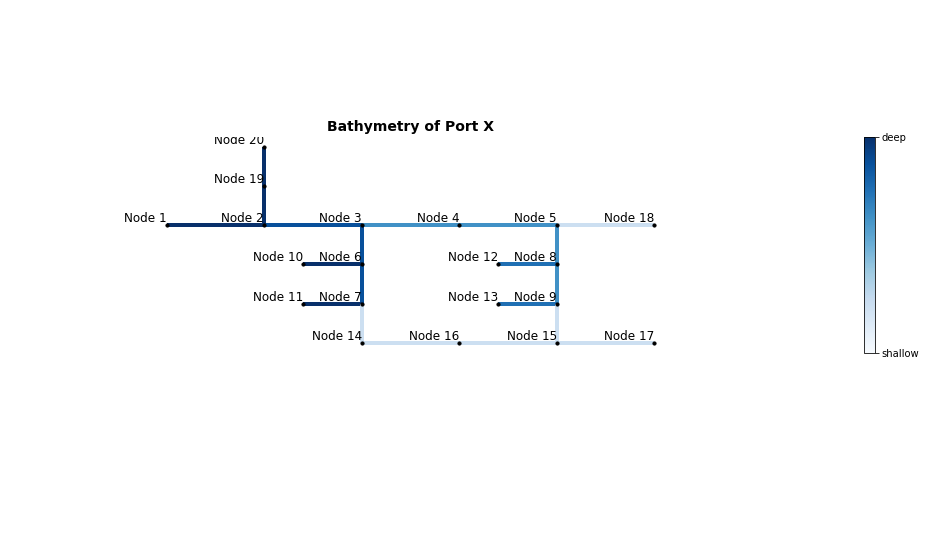

In [10]:
edge_count = []
for edge in enumerate(FG.edges):
    edge_count.append(FG.edges[edge[1]]['Info']['Depth'][0])

colormap = cm.get_cmap('Blues', 256)
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')
ax = fig.add_axes([0, 0.4, 1, 0.3]);
nx.draw(FG, positions, node_size = 10, node_color ='k', with_labels = True, horizontalalignment = 'right', verticalalignment = 'bottom', edge_color = edge_count, edge_cmap = colormap, edge_vmin = 0, arrows = False, width= 4)
plt.axis('equal')
cbar = fig.colorbar(cm.ScalarMappable(cmap=colormap), ax=ax, ticks=[0, 1])
cbar.ax.set_yticklabels(['shallow','deep'])  # vertically oriented colorbar
plt.title('Bathymetry of Port X',fontsize = 14, fontweight='bold')
plt.show()

In [11]:
sim.run(duration = duration)

In [12]:
vessels = sim.environment.vessels
env = sim.environment

In [13]:
df = pd.DataFrame.from_dict(vessels[1].log)
df

,Message,Timestamp,Value,Geometry
0,Sailing from node Node 1 to node Node 2 start,2021-09-17 20:42:23.000000,0.0,POINT (0 0)
1,Sailing from node Node 1 to node Node 2 stop,2021-09-17 20:56:16.333333,0.0,POINT (0.04491576420597607 0)
2,Sailing from node Node 2 to node Node 3 start,2021-09-17 20:56:16.333333,0.0,POINT (0.04491576420597607 0)
3,Sailing from node Node 2 to node Node 3 stop,2021-09-17 21:10:09.666667,0.0,POINT (0.08983152841195215 0)
4,Sailing from node Node 3 to node Node 6 start,2021-09-17 21:10:09.666667,0.0,POINT (0.08983152841195215 0)
5,Sailing from node Node 3 to node Node 6 stop,2021-09-17 21:15:43.000000,0.0,POINT (0.08983152841195215 -0.01808738953497423)
6,Passing Turning Basin,2021-09-17 21:15:43.000000,0.0,POINT (0.08983152841195215 -0.01808738953497423)
7,Sailing from node Node 6 to node Node 7 start,2021-09-17 21:15:43.000000,0.0,POINT (0.08983152841195215 -0.01808738953497423)
8,Sailing from node Node 6 to node Node 7 stop,2021-09-17 21:21:16.333333,0.0,POINT (0.08983152841195215 -0.03617477903374801)
9,Passing Turning Basin,2021-09-17 21:21:16.333333,0.0,POINT (0.08983152841195215 -0.03617477903374801)


In [14]:
def calculate_distance(orig, dest):
    wgs84 = pyproj.Geod(ellps='WGS84')
    
    distance = wgs84.inv(orig[0], orig[1], 
                         dest[0], dest[1])[2]
    
    return distance

vessel_path_x = []
vessel_path_t = []

list_of_nodes = list(vessels[0].env.FG.nodes)

for node in list_of_nodes:
    if 'Origin' in vessels[0].env.FG.nodes[node].keys():
        origin = node
        
    if 'Anchorage' in vessels[0].env.FG.nodes[node].keys():
        list_of_nodes.remove(node)

    if 'Junction' in vessels[0].env.FG.nodes[node].keys() and vessels[0].env.FG.nodes[node]['Junction'][0].name == ['waterway_access','waterway_access','anchorage_access']:
        virtual_anchorage = node
        
for v in range(0,len(vessels)):
    vessel_path_xt = []
    vessel_path_tt = []
    distance = 0
    direction = 0
    vessel_path_t0 = simulation_start.timestamp()
    vessel_path_xt.append(distance)
    vessel_path_tt.append(vessels[v].log["Timestamp"][0].timestamp()-vessel_path_t0)
    for t in range(1,len(vessels[v].log["Message"])):  
        if ('Deberthing stop' in vessels[v].log["Message"][t] or ('Waiting in anchorage stop' in vessels[v].log["Message"][t] and
            vessels[v].log["Message"][-1] == 'Sailing from node Node 2 to node Node 1 stop' and len(vessels[v].log["Message"]) < 20)):
            direction = 1
        for node1 in list_of_nodes: 
            for node2 in list_of_nodes:
                if (vessels[v].log["Message"][t] == 'Sailing from node ' + node1 + ' to node ' + node2 + ' start' or 
                    vessels[v].log["Message"][t] == 'Sailing from node ' + node1 + ' to node ' + node2 + ' stop'):
                    if node1 == origin and node2 == virtual_anchorage:
                        distance_to_anchorage = calculate_distance((vessels[v].env.FG.nodes[node1]['geometry'].x,vessels[v].env.FG.nodes[node1]['geometry'].y),(vessels[v].env.FG.nodes[node2]['geometry'].x,vessels[v].env.FG.nodes[node2]['geometry'].y))
                    
                    if direction == 0:
                        distance += calculate_distance((vessels[v].log["Geometry"][t-1].x,vessels[v].log['Geometry'][t-1].y),(vessels[v].log["Geometry"][t].x,vessels[v].log['Geometry'][t].y))
                    elif direction == 1:
                        distance -= calculate_distance((vessels[v].log["Geometry"][t-1].x,vessels[v].log['Geometry'][t-1].y),(vessels[v].log["Geometry"][t].x,vessels[v].log['Geometry'][t].y))
                    vessel_path_xt.append(distance)
                    vessel_path_tt.append(vessels[v].log["Timestamp"][t].timestamp()-vessel_path_t0)
                    break
                    
    vessel_path_x.append(vessel_path_xt)
    vessel_path_t.append(vessel_path_tt)

In [15]:
def tidal_window_start_stop_xloc(time,signal,correction,roots,start,end):
    for root_start in enumerate(roots):
        if root_start[1] >= start:
            break
    for root_end in enumerate(roots):
        if root_end[1] >= end:
            break
            
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx,array[idx]
    
    idx,x = find_nearest(time,root_start[1])
    ylim = correction

    booleanlist = []
    rootlist = []
    rootlist.append(start)
    
    if root_start != root_end:
        if x >= root_start[1]:
            if signal[idx] > ylim:
                booleanlist.append(0)
                booleanlist.append(1)
                rootlist.append(root_start[1])
            else:
                booleanlist.append(1)
                booleanlist.append(0)
                rootlist.append(root_start[1])
        else:
            if signal[idx] > ylim:
                booleanlist.append(1)
                booleanlist.append(0)
                rootlist.append(root_start[1])
            else:
                booleanlist.append(0)
                booleanlist.append(1)
                rootlist.append(root_start[1])

        if booleanlist[0] == 0:
            boolean = 1
        else:
            boolean = 0

        for root in roots[(root_start[0]+1):root_end[0]]:
            if boolean == 0:
                boolean = 1
            elif boolean == 1:
                boolean = 0
            booleanlist.append(boolean)
            rootlist.append(root)
    else:
        boolean = 1
        booleanlist.append(boolean)
        
    rootlist.append(end)
    if boolean == 0:
        booleanlist.append(1)
    elif boolean == 1:
        booleanlist.append(0)
        
    return booleanlist,rootlist

def tidal_window_start_stop_polygon(booleanlist,rootlist,figylimits):
    xfill_lists = []
    yfill_lists = []
    for i in range(len(booleanlist)):
        xfill_list = []
        yfill_list = []
        if booleanlist[i] == 0 and i != len(booleanlist)-1:
            xfill_list = [rootlist[i],rootlist[i],rootlist[i+1],rootlist[i+1]]
            yfill_list = [figylimits[0],figylimits[1],figylimits[1],figylimits[0]]
            xfill_lists.append(xfill_list)
            yfill_lists.append(yfill_list)
        elif i != len(booleanlist)-1:
            xfill_list = [rootlist[i],rootlist[i],rootlist[i+1],rootlist[i+1]]
            yfill_list = [figylimits[0],figylimits[1],figylimits[1],figylimits[0]]
            xfill_lists.append(xfill_list)
            yfill_lists.append(yfill_list)
    return xfill_lists,yfill_lists

def colors_tidal_window_polygons(xfill_lists,yfill_lists,booleanlist):
    color = []
    for i in range(len(xfill_lists)):
        if booleanlist[i] == 0:
            color.append('red')
        elif booleanlist[i] == 2:
            color.append('darkred')
        else:
            color.append('g')
    return color        
        
def times_tidal_window(vertical_tidal_window_bools,vertical_tidal_window_roots,horizontal_tidal_window_bools,horizontal_tidal_window_roots): 
    list_of_times_vertical_tidal_window = []
    list_of_times_horizontal_tidal_windows = []

    for time in range(len(vertical_tidal_window_roots)):
        list_of_times_vertical_tidal_window.append([vertical_tidal_window_roots[time],vertical_tidal_window_bools[time]])
    for time in range(len(horizontal_tidal_window_roots)):
        list_of_times_horizontal_tidal_windows.append([horizontal_tidal_window_roots[time],horizontal_tidal_window_bools[time]])
        
    list_indexes = list(np.arange(0, len(list_of_times_horizontal_tidal_windows) + 1))
    times_tidal_window = []
    list_of_list_indexes = []

    for time in list_of_times_vertical_tidal_window:
        times_tidal_window.append(time)
        list_of_list_indexes.append(0)
    for time in list_of_times_horizontal_tidal_windows:
        times_tidal_window.append(time)
        list_of_list_indexes.append(1)

    list_of_list_indexes = [x for _, x in sorted(zip(times_tidal_window, list_of_list_indexes))]
    times_tidal_window.sort()

    indexes_to_be_removed = []
    for list_index in list_indexes:
        for time1 in range(len(times_tidal_window)):
            if times_tidal_window[time1][1] == 0 and list_of_list_indexes[time1] == list_index:
                for time2 in range(len(times_tidal_window)):
                    if time2 > time1 and times_tidal_window[time2][1] == 1 and list_of_list_indexes[time2] == list_index:
                        indexes = np.arange(time1 + 1, time2, 1)
                        for index in indexes:
                            indexes_to_be_removed.append(index)
                        break

    for list_index in list_indexes:
        for time1 in range(len(times_tidal_window)):
            if times_tidal_window[time1][1] == 1 and list_of_list_indexes[time1] == list_index:
                for time2 in range(len(times_tidal_window)):
                    if time2 < time1 and times_tidal_window[time2][1] == 0 and list_of_list_indexes[time2] == list_index:
                        break
                if time2 > time1:
                    indexes = np.arange(0, time1, 1)
                    for index in indexes:
                        indexes_to_be_removed.append(index)

    for time in range(len(times_tidal_window)):
        if time == 0:
            continue
        elif times_tidal_window[time][1] == 1 and times_tidal_window[time - 1][1] == 1:
            indexes_to_be_removed.append(time - 1)
        elif times_tidal_window[time][1] == 0 and times_tidal_window[time - 1][1] == 0:
            indexes_to_be_removed.append(time)

    indexes_to_be_removed.sort()
    indexes_to_be_removed = list(dict.fromkeys(indexes_to_be_removed))
    
#     for remove_index in list(reversed(indexes_to_be_removed)):
#         times_tidal_window.pop(remove_index)
#         list_of_list_indexes.pop(remove_index)
      
    times_tidal_window_bools = []
    times_tidal_window_roots = []
    for time in times_tidal_window:
        times_tidal_window_bools.append(time[1])
        times_tidal_window_roots.append(time[0])

    return times_tidal_window_bools,times_tidal_window_roots,indexes_to_be_removed

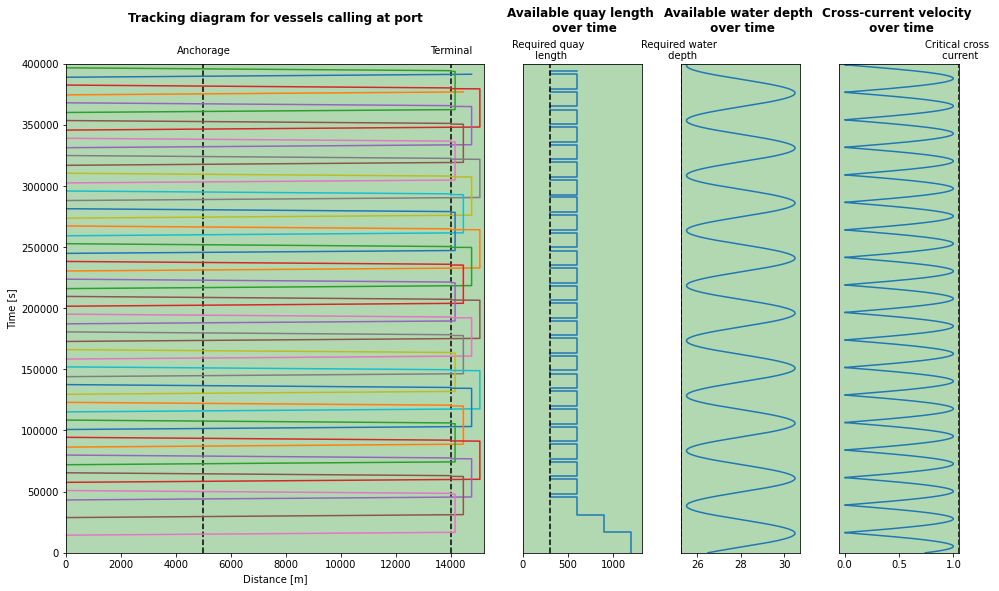

In [16]:
terminal = vessels[0].env.FG.edges['Node 7','Node 11']['Terminal'][0]
if terminal.type == 'quay':
    max_available_quay_length = terminal.length.capacity
if terminal.type == 'jetty':
    max_available_quay_length = len(terminal.jetty_locations)

start = 0
end = duration  
ax3xlist = [eta+28 for eta in water_level[1][0][1]]
ax3ylist = [t-simulation_start.timestamp() for t in water_level[1][0][0]]
ax4xlist = [abs(vel) for vel in current_velocity[1][2][1]]
ax4ylist = [t-simulation_start.timestamp() for t in current_velocity[1][0][0]]
required_water_level = vessels[0].metadata['ukc'] + vessels[0].T_f
root_interp_water_level_at_edge = sc.interpolate.CubicSpline(ax3ylist,[x-required_water_level for x in ax3xlist])
root_interp_cross_current_at_edge = sc.interpolate.CubicSpline(ax4ylist,[abs(x)-vessels[0].metadata['max_cross_current'] for x in ax4xlist])
stst_vtw,roots_vtw = tidal_window_start_stop_xloc(ax3ylist,ax3xlist,required_water_level,root_interp_water_level_at_edge.roots(),start,end)
stst_htw,roots_htw = tidal_window_start_stop_xloc(ax4ylist,ax4xlist,-vessels[0].metadata['max_cross_current'],root_interp_cross_current_at_edge.roots(),start,end)
stst_tw,roots_tw,indexes_to_be_removed = times_tidal_window(stst_vtw,roots_vtw,stst_htw,roots_htw)
for i in indexes_to_be_removed:
    if stst_tw[i] == 0:
        stst_tw[i] = 2   
    if stst_tw[i] == 1:
        stst_tw[i] = 0
    
if terminal.type == 'quay':
    time_available_quay_length = []
    available_quay_length = []
    quay_level = 0
    time_available_quay_length.append(0)
    available_quay_length.append(quay_level)
    for t in range(len(terminal.log["Message"])):
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(quay_level)
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(terminal.log["Value"][t])
        quay_level = terminal.log["Value"][t]
        
if terminal.type == 'jetty':
    time_available_quay_length = []
    available_quay_length = []
    quay_level = 0
    time_available_quay_length.append(0)
    available_quay_length.append(quay_level)
    for t in range(len(terminal.log["Message"])):
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(quay_level)
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(terminal.log["Value"][t])
        quay_level = terminal.log["Value"][t]
    
anchorage = vessels[0].env.FG.nodes['Node 19']['Anchorage'][0]
time_anchorage_occupation = []
anchorage_occupation = []
anchorage_capacity = 0
time_anchorage_occupation.append(0)
anchorage_occupation.append(anchorage_capacity)
for t in range(len(anchorage.log["Message"])):
    time_anchorage_occupation.append(anchorage.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
    anchorage_occupation.append(anchorage_capacity)
    time_anchorage_occupation.append(anchorage.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
    anchorage_occupation.append(anchorage.log["Value"][t])
    anchorage_capacity = anchorage.log["Value"][t]

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16, 9),gridspec_kw={'width_ratios': [3.5, 1, 1, 1]})
ax1.set_xlim([0,14000+terminal.length.capacity])
figxlimits = ax1.axes.get_xlim()
xfill_lists,yfill_lists = tidal_window_start_stop_polygon(stst_tw,roots_tw,figxlimits)
colors = colors_tidal_window_polygons(yfill_lists,xfill_lists,stst_tw)
for c in range(len(colors)):
    ax1.fill(yfill_lists[c],xfill_lists[c],colors[c],alpha=.3)
ax1.axvline(distance_to_anchorage,color = 'k',linestyle = '--')
ax1.axvline(14000,color = 'k',linestyle = '--')
ax1.text(distance_to_anchorage,1.02*end,'Anchorage',horizontalalignment  = 'center')
ax1.text(14000,1.02*end,'Terminal',horizontalalignment  = 'center')
for v in reversed(range(0,len(vessels))):
    ax1.plot(vessel_path_x[v],vessel_path_t[v])
ax1.set_title("Tracking diagram for vessels calling at port", fontweight='bold', pad = 42)
ax1.set_xlabel('Distance [m]')
ax1.set_xlim(figxlimits)
ax1.set_ylabel('Time [s]')
ax1.set_ylim([start,end]);

ax2.plot([max_available_quay_length-x for x in available_quay_length],time_available_quay_length)
ax2.set_xlim([0,1.1*max_available_quay_length])
figxlimits = ax2.axes.get_xlim()
xfill_lists,yfill_lists = tidal_window_start_stop_polygon(stst_tw,roots_tw,figxlimits)
colors = colors_tidal_window_polygons(yfill_lists,xfill_lists,stst_tw)
for c in range(len(colors)):
    ax2.fill(yfill_lists[c],xfill_lists[c],colors[c],alpha=.3)
if terminal.type == 'quay':
    ax2.axvline(vessels[0].L,color = 'k', linestyle = '--')
    ax2.set_title("Available quay length \n over time", fontweight='bold', pad = 32)
    ax2.text(vessels[0].L,1.01*end,'Required quay \n length',horizontalalignment = 'center') 
elif terminal.type == 'jetty':
    ax2.axvline(1,color = 'k', linestyle = '--')
    ax2.set_title("Available jetties \n over time", fontweight='bold', pad = 32)
    ax2.text(1,1.01*end,'Required jetty \n',horizontalalignment = 'center')
ax2.set_xlim(figxlimits)
ax2.yaxis.set_visible(False)
ax2.set_ylim([start,end]);

ax3.plot(ax3xlist,ax3ylist)
ax3.set_ylim([start,end])
figxlimits = ax3.axes.get_xlim()
xfill_lists,yfill_lists = tidal_window_start_stop_polygon(stst_tw,roots_tw,figxlimits)
colors = colors_tidal_window_polygons(yfill_lists,xfill_lists,stst_tw)
for c in range(len(colors)):
    ax3.fill(yfill_lists[c],xfill_lists[c],colors[c],alpha=.3)
ax3.yaxis.set_visible(False)
ax3.set_ylim([start,end])
ax3.set_xlim(figxlimits)

if required_water_level >= ax3.axes.get_xlim()[1]:
    ax3.axvline(ax3.axes.get_xlim()[1],color = 'k', linestyle = '--')
    ax3.text(ax3.axes.get_xlim()[1],1.01*end,'Required water \n depth',horizontalalignment = 'center')
elif required_water_level <= ax3.axes.get_xlim()[0]:
    ax3.axvline(ax3.axes.get_xlim()[0],color = 'k', linestyle = '--')
    ax3.text(ax3.axes.get_xlim()[0],1.01*end,'Required water \n depth',horizontalalignment = 'center')
else:  
    ax3.axvline(required_water_level,color = 'k', linestyle = '--')
    ax3.text(required_water_level,1.01*end,'Required water \n depth',horizontalalignment = 'center')
ax4.yaxis.set_visible(False)
ax3.set_title("Available water depth \n over time", fontweight='bold', pad = 32)
ax3.yaxis.set_visible(False)

ax4.plot(ax4xlist,ax4ylist)
ax4.set_ylim([start,end])
figxlimits = ax4.axes.get_xlim()
xfill_lists,yfill_lists = tidal_window_start_stop_polygon(stst_tw,roots_tw,figxlimits)
colors = colors_tidal_window_polygons(yfill_lists,xfill_lists,stst_tw)
for c in range(len(colors)):
    ax4.fill(yfill_lists[c],xfill_lists[c],colors[c],alpha=.3)
ax4.set_title("Cross-current velocity \n over time", fontweight='bold', pad = 32)
ax4.set_ylim([start,end])
ax4.set_xlim(figxlimits)
if vessels[0].metadata['max_cross_current'] <= ax4.axes.get_xlim()[1]:
    ax4.axvline(vessels[0].metadata['max_cross_current'],color = 'k', linestyle = '--')
    ax4.text(vessels[0].metadata['max_cross_current'],1.01*end,'Critical cross \n current',horizontalalignment = 'center')
else:
    ax4.axvline(ax4.axes.get_xlim()[1],color = 'k', linestyle = '--')
    ax4.text(ax4.axes.get_xlim()[1],1.01*end,'Critical cross \n current',horizontalalignment = 'center')
ax4.yaxis.set_visible(False)
plt.show()

In [17]:
def occupancy_calculation(infrastructure,duration):
    time_infrastructure_occupation = []
    infrastructure_occupation = []
    infrastructure_capacity = 0
    time_infrastructure_occupation.append(0)
    t = False
    infrastructure_occupation.append(infrastructure_capacity)
    for t in range(len(infrastructure.log["Message"])):
        time_infrastructure_occupation.append(infrastructure.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        infrastructure_occupation.append(infrastructure_capacity)
        time_infrastructure_occupation.append(infrastructure.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        infrastructure_occupation.append(infrastructure.log["Value"][t])
        infrastructure_capacity = infrastructure.log["Value"][t]
    
    if t:
        time_infrastructure_occupation.append(duration)
        infrastructure_occupation.append(infrastructure.log["Value"][t])
    return time_infrastructure_occupation,infrastructure_occupation

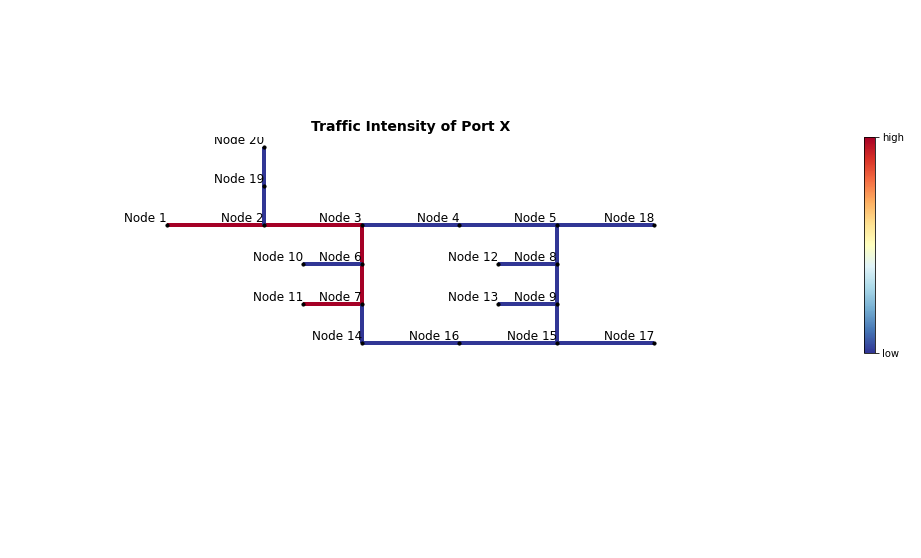

In [18]:
edge_count = np.zeros(len(FG.edges))
for v in vessels:
    df = pd.DataFrame.from_dict(v.log)
    for message in df['Message']:
        if 'Sailing' in message and 'stop' in message:
            r = re.search('Sailing from node (.+?) to node (.+?) stop', message)
            if r:
                node1 = r.group(1)
                node2 = r.group(2)
            for e in enumerate(FG.edges):
                if (node1,node2) == e[1]:
                    edge_count[e[0]] += 1

edge_count_final = np.zeros(len(FG.edges))
for e in enumerate(FG.edges):
    for e2 in enumerate(FG.edges):
        if [e[1][0],e[1][1]] == [e2[1][1],e2[1][0]]:
            edge_count_final[e[0]] = edge_count[e[0]]+edge_count[e2[0]]
            edge_count_final[e2[0]] = edge_count_final[e[0]] 
            break

colormap = cm.get_cmap('RdYlBu_r', 256)
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')
ax = fig.add_axes([0, 0.4, 1, 0.3]);
nx.draw(FG, positions, node_size = 10, node_color ='k', with_labels = True, horizontalalignment = 'right', verticalalignment = 'bottom', edge_color = edge_count_final, edge_cmap = colormap, arrows = False, width= 4)
plt.axis('equal')
cbar = fig.colorbar(cm.ScalarMappable(cmap=colormap), ax=ax, ticks=[0, 1])
cbar.ax.set_yticklabels(['low','high'])  # vertically oriented colorbar
plt.title('Traffic Intensity of Port X',fontsize = 14, fontweight='bold')
plt.show()

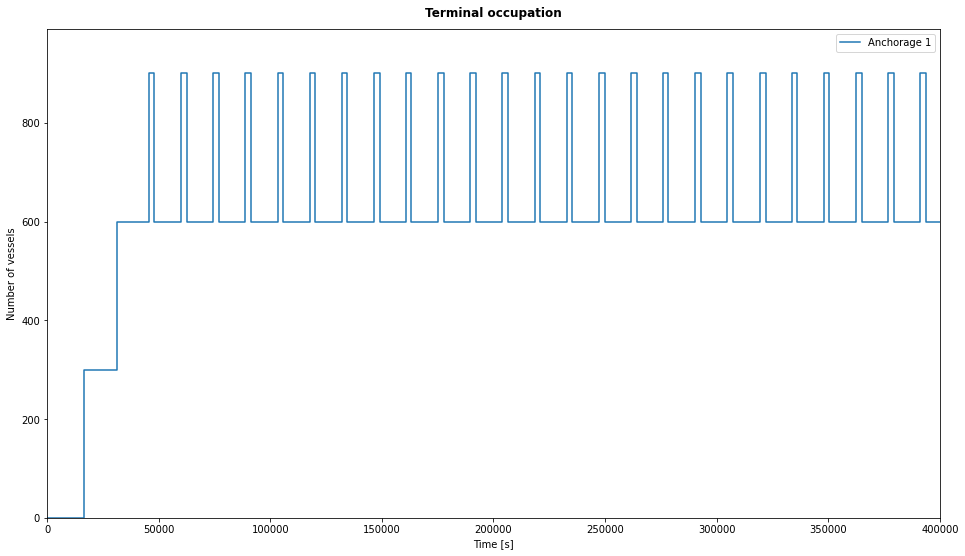

terminal occupancy: 0.5508689852562547


In [19]:
df = pd.DataFrame.from_dict(terminal.log)
df

terminal_edges = [['Node 7','Node 11']]
fig,ax = plt.subplots(figsize=(16, 9))
start = 0
end = duration

for edge in enumerate(terminal_edges):
    terminal = vessels[0].env.FG.edges[edge[1]]['Terminal'][0]
    plt.plot(occupancy_calculation(terminal,duration)[0],occupancy_calculation(terminal,duration)[1])
    if edge[0] == 0:
        ymax = np.max(occupancy_calculation(terminal,duration)[1])
    elif np.max(occupancy_calculation(terminal,duration)[1]) > ymax:
        ymax = np.max(occupancy_calculation(terminal,duration)[1])
    
plt.xlabel('Time [s]')
plt.xlim([start,end])
plt.ylabel('Number of vessels')
plt.ylim([0,math.ceil(1.1*ymax)])
plt.title("Terminal occupation", fontweight='bold', pad = 12)
plt.legend(['Anchorage 1','Anchorage 2'])
plt.show()

delta_time = []
quay_occupation = []
time = []
time.append(simulation_start.timestamp())
if terminal.type == 'quay':
    max_occupation = terminal.length.capacity
elif terminal.type == 'jetty':
    max_occupation = 4
quay_occupation.append(max_occupation)

for t in range(len(terminal.log["Message"])):
    time.append(terminal.log["Timestamp"][t].timestamp())
    delta_time.append(time[t+1]-time[t])
    quay_occupation.append(terminal.log["Value"][t])

delta_time.append(simulation_start.timestamp()+duration-time[t+1])
    
weighted_quay_occupancy = []
for t in range(len(quay_occupation)):
    weighted_quay_occupancy.append(quay_occupation[t]/max_occupation*delta_time[t])
    
    
terminal_occupancy = np.sum(weighted_quay_occupancy)/duration
print('terminal occupancy:',terminal_occupancy)

In [20]:
anchorage = vessels[0].env.FG.nodes['Node 19']['Anchorage'][0]
df = pd.DataFrame.from_dict(anchorage.log)
df

,Message,Timestamp,Value,Geometry


<ipython-input-21-f77ff7583cbf>:16: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.



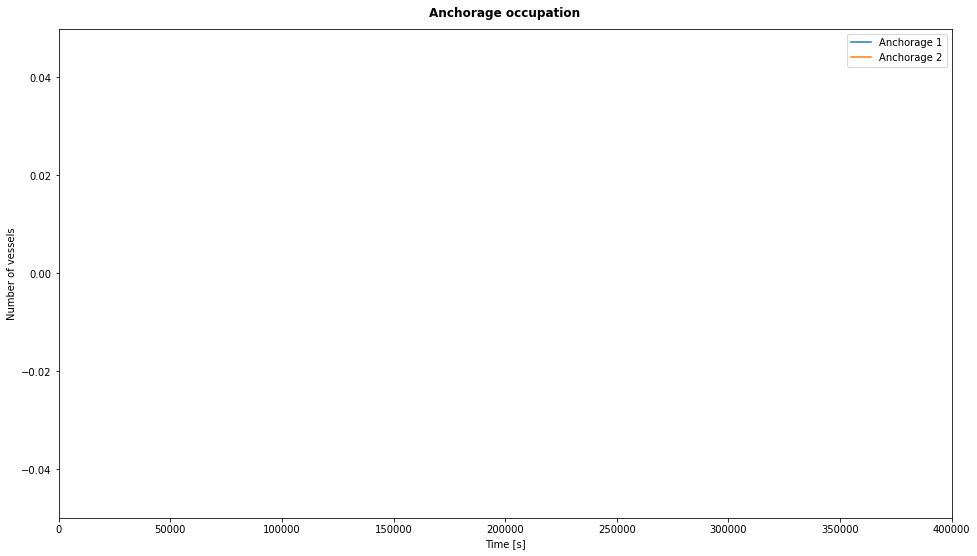

In [21]:
anchorage_nodes = ['Node 19','Node 20']
fig,ax = plt.subplots(figsize=(16, 9))
start = 0
end = duration
for node in enumerate(anchorage_nodes):
    anchorage = vessels[0].env.FG.nodes[node[1]]['Anchorage'][0]
    plt.plot(occupancy_calculation(anchorage,duration)[0],occupancy_calculation(anchorage,duration)[1])
    if node[0] == 0:
        ymax = np.max(occupancy_calculation(anchorage,duration)[1])
    elif np.max(occupancy_calculation(anchorage,duration)[1]) > ymax:
        ymax = np.max(occupancy_calculation(anchorage,duration)[1])
    
plt.xlabel('Time [s]')
plt.xlim([start,end])
plt.ylabel('Number of vessels')
plt.ylim([0,math.ceil(1.1*ymax)])
plt.title("Anchorage occupation", fontweight='bold', pad = 12)
plt.legend(['Anchorage 1','Anchorage 2'])
plt.show()

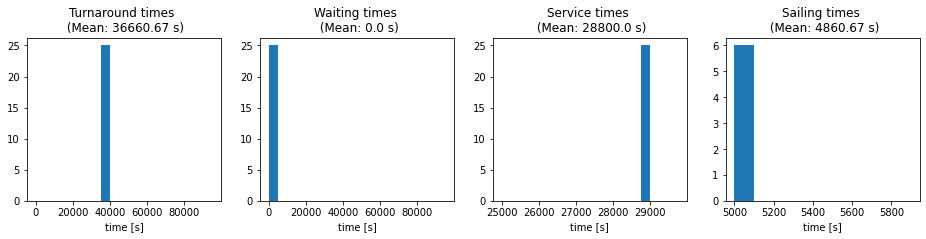

In [22]:
turnaround_times = []
waiting_times = []
sailing_times = []
service_times = []
list_berth_productivity = []
number_of_vessels_served = 0
for v in range(len(vessels)):
    start_node = []
    end_node = []
    waiting_time = 0
    sailing_time = 0
    berth_productivity = 1
    for t in range(len(vessels[v].log["Message"])):
        if t == 0:
            turnaround_start = vessels[v].log["Timestamp"][t].timestamp()
            text = vessels[v].log["Message"][t]
            match = re.search('from node (.+?) to', text)
            if match:
                start_node = match.group(1)
        if 'Waiting in anchorage stop' in vessels[v].log["Message"][t]:
            waiting_time = vessels[v].log['Value'][t]
        if 'Sailing from node' in vessels[v].log["Message"][t] and 'stop' in vessels[v].log["Message"][t]:
            sailing_time += vessels[v].log["Timestamp"][t].timestamp()-vessels[v].log["Timestamp"][t-1].timestamp()
        if 'Loading stop' in vessels[v].log["Message"][t]:
            service_time = vessels[v].log["Timestamp"][t].timestamp()-vessels[v].log["Timestamp"][t-3].timestamp()
        if 'Deberthing start' in vessels[v].log["Message"][t] and 'Waiting for tidal window stop' in vessels[v].log["Message"][t-1]:
            berth_productivity = service_time/(service_time+vessels[v].log["Value"][t-1])
        if t == len(vessels[v].log["Message"])-1:
            turnaround_end = vessels[v].log["Timestamp"][t].timestamp()
            text = vessels[v].log["Message"][t]
            match = re.search('to node (.+?) stop', text)
            if match:
                end_node = match.group(1)

    if start_node == end_node and end_node != []:
        turnaround_times.append(turnaround_end-turnaround_start)
        waiting_times.append(waiting_time)
        number_of_vessels_served += 1
        sailing_times.append(sailing_time)
        service_times.append(service_time)
        list_berth_productivity.append(berth_productivity)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16, 3))
ax1.hist(turnaround_times, bins=range(0,100000,5000))
ax1.set_title('Turnaround times \n (Mean: '+ str(round(np.mean(turnaround_times),2)) + ' s)')
ax1.set_xlabel('time [s]')

ax2.hist(waiting_times, bins=range(0,100000,5000))
ax2.set_title('Waiting times \n (Mean: '+ str(round(np.mean(waiting_times),2)) + ' s)')
ax2.set_xlabel('time [s]')

ax3.hist(service_times, bins=range(25000,30000,250))
ax3.set_title('Service times \n (Mean: '+ str(round(np.mean(service_times),2)) + ' s)')
ax3.set_xlabel('time [s]')

ax4.hist(sailing_times, bins=range(5000,6000,100))
ax4.set_title('Sailing times \n (Mean: '+ str(round(np.mean(sailing_times),2)) + ' s)')
ax4.set_xlabel('time [s]')
plt.show()

In [23]:
print('Average berth productivity:',np.mean(list_berth_productivity))

Average berth productivity: 1.0


In [24]:
print('The total number of vessels served is',number_of_vessels_served, 'in a time of', duration, 's.')

The total number of vessels served is 25 in a time of 400000 s.


In [25]:
number_of_encounters = 0
for v1 in range(len(vessels)):
    for v2 in range(len(vessels[(v1+1):])):
        v2 = v2+(v1+1)
        for t1 in range(len(vessels[v1].log["Message"])):
            if 'Sailing from node' in vessels[v1].log["Message"][t1] and 'stop' in vessels[v1].log["Message"][t1]:
                text1 = vessels[v1].log["Message"][t1]
                match1 = re.search('from node (.+?) to', text1)
                match2 = re.search('to node (.+?) stop', text1)
                if match1 and match2:
                    node1 = match1.group(1)
                    node2 = match2.group(1)
                    time_start1 = vessels[v1].log["Timestamp"][t1-1].timestamp()
                    time_stop1 = vessels[v1].log["Timestamp"][t1].timestamp()
                    for t2 in range(len(vessels[v2].log["Message"])):
                        if 'Sailing from node' in vessels[v2].log["Message"][t2] and 'stop' in vessels[v2].log["Message"][t2]:
                            time_start2 = vessels[v2].log["Timestamp"][t2-1].timestamp()
                            time_stop2 = vessels[v2].log["Timestamp"][t2].timestamp()
                            text2 = vessels[v2].log["Message"][t2]
                            if (time_start2 <= time_stop1 and time_start2 >= time_start1) or (time_stop2 <= time_stop1 and time_stop2 >= time_start1):
                                if node2 + ' to' in text2 and node1 + ' stop' in text2:
                                    number_of_encounters += 1          

In [26]:
print('The total number of vessel encounters is',number_of_encounters, 'in a time of', duration, 's.')

The total number of vessel encounters is 0 in a time of 400000 s.


In [27]:
anchorage = vessels[0].env.FG.nodes['Node 19']['Anchorage'][0]
time_anchorage_occupation = []
anchorage_occupation = []
for t in range(len(anchorage.log["Message"])):
    time_anchorage_occupation.append(anchorage.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
    anchorage_occupation.append(anchorage.log["Value"][t])

list_anchorage_occupancy = []
for t in range(len(time_anchorage_occupation)):
    if t == 0:
        list_anchorage_occupancy.append(anchorage_occupation[t]*(time_anchorage_occupation[t]))
    elif t == len(time_anchorage_occupation)-1:
        list_anchorage_occupancy.append(anchorage_occupation[t]*(duration-time_anchorage_occupation[t]))
    else:
        list_anchorage_occupancy.append(anchorage_occupation[t]*(time_anchorage_occupation[t]-time_anchorage_occupation[t-1]))

print('Anchorage occupancy:', np.sum(list_anchorage_occupancy)/(duration*anchorage.anchorage_area['Node 19'].capacity))

Anchorage occupancy: 0.0
